In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp

In [2]:
from dishpylib.pyhelpers import get_env_context
from dishpylib.pyhelpers import get_git_revision_hash
from dishpylib.pyhelpers import make_timestamp
from dishpylib.pyhelpers import print_runtime

In [3]:
print_runtime()

context: ci
hostname: f731c44d3036
interpreter: 3.8.10 (default, May  5 2021, 03:01:07)  [GCC 7.5.0]
revision: 66d623e8
timestamp: 2021-06-01T04:15:52Z00:00

IPython==7.16.1
boto3==1.14.44
botocore==1.17.44
iterdub==0.2.0
matplotlib==3.3.2
pandas==1.1.2
scipy==1.5.4
seaborn==0.11.0
teeplot==0.1.1


# get data

In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/series-profiles/stage=8+what=elaborated/',
)

In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (286,293,300,301,302,303,305,306,307,308,314,315,316,317,318,324,325,326) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


'-2abc3abcc922ebb6'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

In [7]:
dfm10 = df[ df['Stint'] % 10 == 0 ]

# how do fitness complexity and robustness relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


<AxesSubplot:xlabel='Fitness Complexity', ylabel='Fraction Mutations that are Deleterious'>

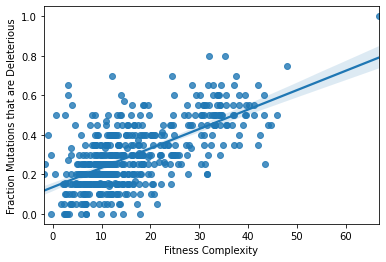

In [8]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


(0.48213190001614065, 0.0016308977487715518)

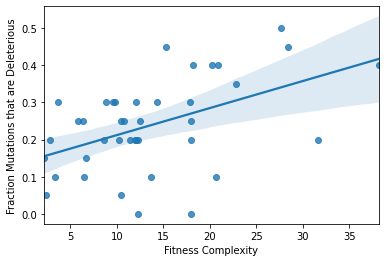

In [9]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-40',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)

fil = df40.dropna(
    subset=[
        'Fitness Complexity',
        'Fraction Mutations that are Deleterious',
    ],
)
stats.pearsonr(
    fil['Fitness Complexity'],
    fil['Fraction Mutations that are Deleterious'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


(0.545918780639194, 0.000268801647970238)

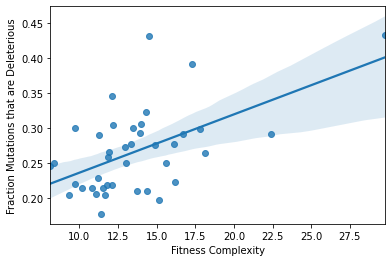

In [10]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'groupby-Series-mean',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
)

# how do phenotype complexity and robustness relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


<AxesSubplot:xlabel='Phenotype Complexity', ylabel='Fraction Mutations that are Deleterious'>

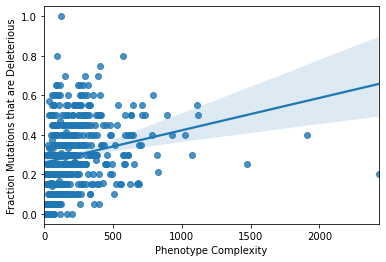

In [11]:
tp.tee(
    sns.regplot,
    data=df,
    x='Phenotype Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


(0.42780822783803757, 0.005893294232276077)

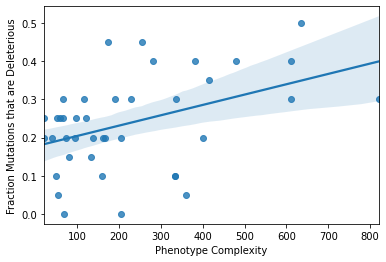

In [12]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Phenotype Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-40',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)

fil = df40.dropna(
    subset=[
        'Phenotype Complexity',
        'Fraction Mutations that are Deleterious',
    ],
)
stats.pearsonr(
    fil['Phenotype Complexity'],
    fil['Fraction Mutations that are Deleterious'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


(0.28174634156646505, 0.07818904862894609)

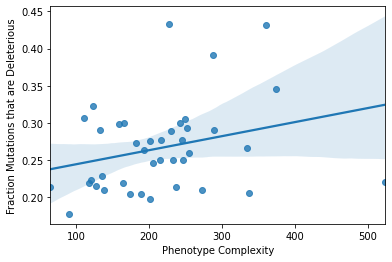

In [13]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Phenotype Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'groupby-Series-mean',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)
stats.pearsonr(
    df.groupby('Series')['Phenotype Complexity'].mean(),
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
)

# how do cardinal interface complexity and robustness relate?

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


<AxesSubplot:xlabel='Cardinal Interface Complexity', ylabel='Fraction Mutations that are Deleterious'>

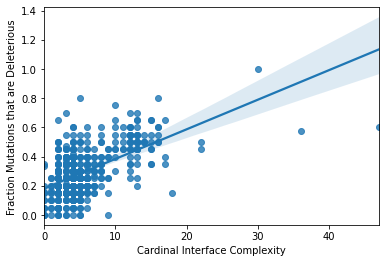

In [14]:
tp.tee(
    sns.regplot,
    data=df,
    x='Cardinal Interface Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


(0.12654215648131664, 0.43652175485986455)

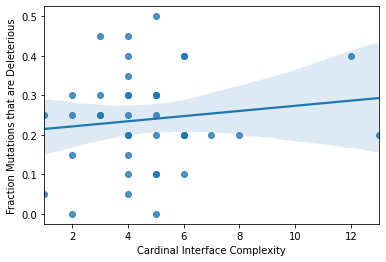

In [15]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Cardinal Interface Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-40',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)

fil = df40.dropna(
    subset=[
        'Cardinal Interface Complexity',
        'Fraction Mutations that are Deleterious',
    ],
)
stats.pearsonr(
    fil['Cardinal Interface Complexity'],
    fil['Fraction Mutations that are Deleterious'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


(0.6157989138392631, 2.341067531242516e-05)

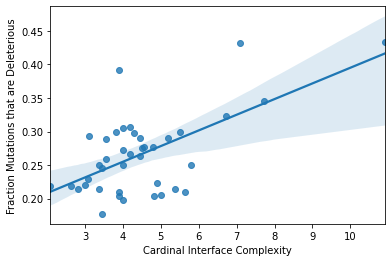

In [16]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Cardinal Interface Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'groupby-Series-mean',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)
stats.pearsonr(
    df.groupby('Series')['Cardinal Interface Complexity'].mean(),
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
)

# how do fitness complexity and mutating mutant fitness relate?

## mean

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.png


<AxesSubplot:xlabel='Fitness Complexity', ylabel='Mean Mutating Mutant Fitness Differential'>

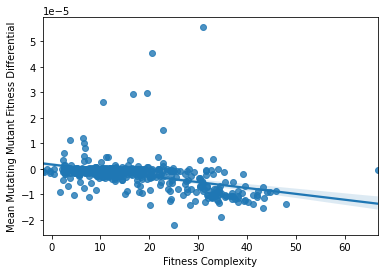

In [17]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Mean Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.png


(-0.5807851442792211, 8.526625023001576e-05)

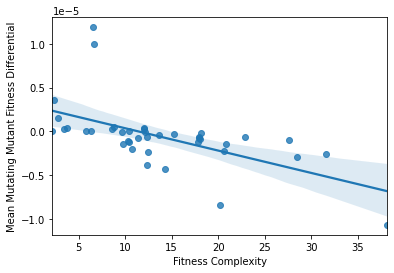

In [18]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Mean Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-40',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)

fil = df40.dropna(
    subset=[
        'Fitness Complexity',
        'Mean Mutating Mutant Fitness Differential',
    ],
)
stats.pearsonr(
    fil['Fitness Complexity'],
    fil['Mean Mutating Mutant Fitness Differential'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.png


(-0.5164447483919057, 0.0006460665749283192)

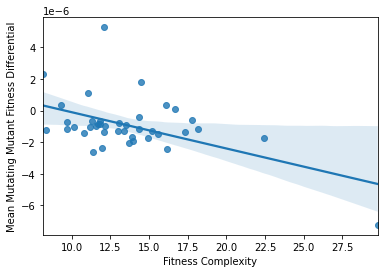

In [19]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Mean Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'groupby-Series-mean',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),    
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Mean Mutating Mutant Fitness Differential'].mean(),
)

## median

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.png


<AxesSubplot:xlabel='Fitness Complexity', ylabel='Median Mutating Mutant Fitness Differential'>

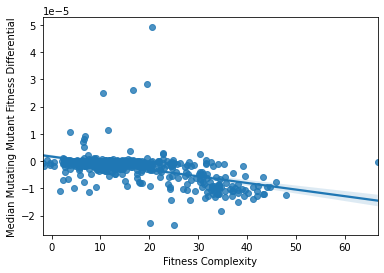

In [20]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Median Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),      
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.png


(-0.5285507238124557, 0.0004550391177779839)

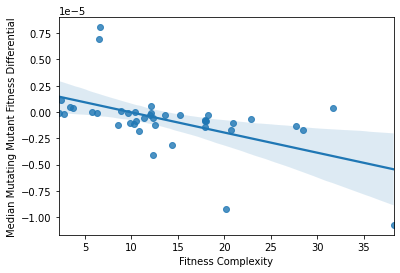

In [21]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Median Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-40',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

fil = df40.dropna(
    subset=[
        'Fitness Complexity',
        'Median Mutating Mutant Fitness Differential',
    ],
)
stats.pearsonr(
    fil['Fitness Complexity'],
    fil['Median Mutating Mutant Fitness Differential'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.png


(-0.5629552045596851, 0.0001558562056796435)

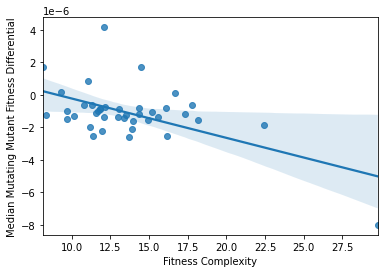

In [22]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Median Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'groupby-Series-mean',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),       
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Median Mutating Mutant Fitness Differential'].mean(),
)

## fraction deleterious

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.png


<AxesSubplot:xlabel='Fitness Complexity', ylabel='Fraction Mutating Mutations that are Deleterious'>

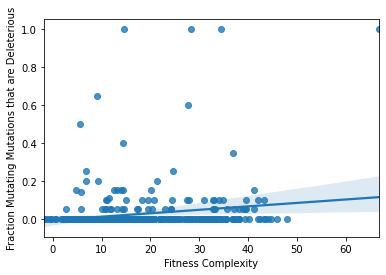

In [23]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Fraction Mutating Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),   
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.png


(0.004312058866623932, 0.9789325864508768)

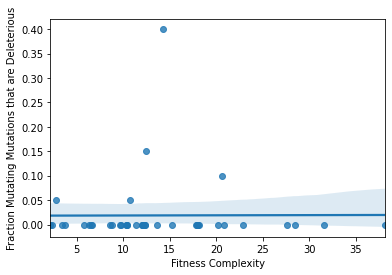

In [24]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Fraction Mutating Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-40',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),   
    },
)

fil = df40.dropna(
    subset=[
        'Fitness Complexity',
        'Fraction Mutating Mutations that are Deleterious',
    ],
)
stats.pearsonr(
    fil['Fitness Complexity'],
    fil['Fraction Mutating Mutations that are Deleterious'],
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.png


(0.0634965343051644, 0.6970940121905651)

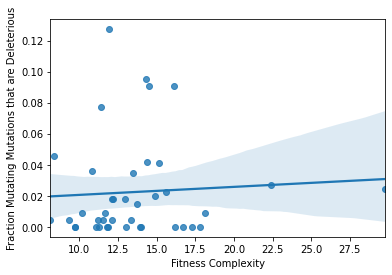

In [25]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Fraction Mutating Mutations that are Deleterious',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'groupby-Series-mean',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),   
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Fraction Mutating Mutations that are Deleterious'].mean(),
)